# Проект - Определение выгодного тарифа телеком-компании

## Описание и задачи проекта.



    Компания «Мегалайн» — федеральный оператор сотовой связи предлагает клиентам  два тарифных плана: «Смарт» и «Ультра». 
    Цель проекта:
    - По запросу коммерческого департамента, надо выяснить - какой тариф  более выгодный для компании.
    Задачи проекта: 
    - нужно сделать предварительный анализ тарифов на небольшой выборке клиентов ,а именно-500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
    -проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd 
import math
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
calls = pd.read_csv('/datasets/calls.csv')# Прочитаем файлы для исследования
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.info()# изучим данные таблиц

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()# посмотрим первые 5 строк  таблицы calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
internet.head()# посмотрим первые 5 строк  таблицы internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages.head()# посмотрим первые 5 строк таблицы messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
tariffs.head()# посмотрим первые 5 строк  таблицы internet

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.head()# посмотрим первые 5 строк  таблицы users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
calls.isna().sum()# проверим количество пропусков в таблице calls

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [14]:
internet.isna().sum()# проверим количество пропусков в таблице internet

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [15]:
messages.isna().sum()# проверим количество пропусков в таблице messages

id              0
message_date    0
user_id         0
dtype: int64

In [16]:
tariffs.isna().sum()# проверим количество пропусков в таблице tariffs

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [17]:
users.isna().sum()# проверим количество пропусков в таблице users

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В итоге видно, что есть пропуски только в столбце churn_date, это те тарифные планы,которые  ещё действовали на момент выгрузки данных. Просмотрев общую информацию по таблицам, видим , что данные неоднородные и нужно изменить типы данных для целей исследования.

##  Предобработка данных

### Изменение типов данных

Изменим столбцы с датами с типом данных object на datatime64

In [18]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date']= pd.to_datetime(messages['message_date'],format ='%Y-%m-%d')
internet['session_date']= pd.to_datetime(internet['session_date'],format ='%Y-%m-%d')

In [19]:
messages['id'].astype('int')

0           10000
1           10001
2           10002
3           10003
4           10004
           ...   
123031    1499179
123032    1499180
123033    1499181
123034    1499182
123035    1499183
Name: id, Length: 123036, dtype: int64

In [20]:
users.info()# проверка изменения типа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [21]:
messages.info()# проверка изменения типа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [22]:
internet.info()# проверка изменения типа

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


### Анализ выбросов и проверка на наличие ошибок

Проверим, если дубликаты в данных таблицах, если есть, нужно их удалить.

In [23]:
calls.duplicated().sum()

0

In [24]:
internet.duplicated().sum()

0

In [25]:
messages.duplicated().sum()

0

In [26]:
tariffs.duplicated().sum()

0

In [27]:
users.duplicated().sum()

0

После проверки видно, что явные дубликаты отсутствуют в таблицах.

Теперь нужно посмотреть, какие выбросы есть в данных.Построим график "ящик с усами" 

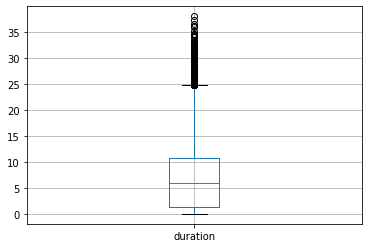

In [28]:
calls.boxplot('duration');# построим график для определения выбросов в таблице calls

In [29]:
len(calls)# посмотрим количество строк в  таблице calls

202607

In [30]:
def percentage(part, whole): # создадим функцию расчета доли выбросов  в процентах
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print('Доля выбросов в таблице calls составляет',percentage(682, 202607))

Доля выбросов в таблице calls составляет 0.33661225920131094%


Доля выбросов незначительна и 40 минут разговора вполне может быть в действительности.

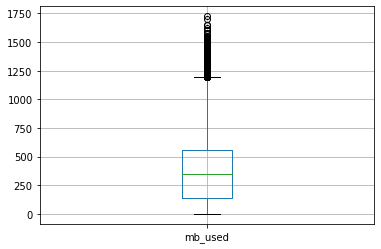

In [31]:
internet.boxplot('mb_used'); # построим график для определения выбросов в таблице internet

In [32]:
len(internet)

149396

In [33]:
def percentage(part, whole): # создадим функцию расчета доли выбросов  в процентах
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print('Доля выбросов в таблице internet составляет',percentage(499, 149100))

Доля выбросов в таблице internet составляет 0.3346747149564051%


Доля выбросов незначительна  в таблице internet, значит можно не удалять их для целей исследования.

Добавим в каждую из таблиц столбец month,а затем объединим все таблицы по этому столбцу.

In [34]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [35]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [36]:
calls['duration']= np.ceil(calls['duration'])# округляем минуты разговора до ближайщего целого числа

In [37]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [38]:
len(calls)

202607

Сделаем агрегированный датасет по calls.

In [39]:
calls_agg = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()


In [40]:
calls_agg.head()

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [41]:
calls_agg.columns = ['user_id','month', 'calls_cnt', 'calls_sum']

In [42]:
calls_agg.head()

,user_id,month,calls_cnt,calls_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [43]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [44]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [45]:
len(messages)

123036

Теперь сделаем агрегированный датасет по сообщениям, таким образом посчитаем количество сообщений по месяцам по абонентам.


In [46]:
messages_agg = messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).reset_index()


In [47]:
messages_agg.head()

,user_id,month,count
,,,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [48]:
messages_agg.columns = ['user_id','month','mess_count']

In [49]:
messages_agg.head()

,user_id,month,mess_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [50]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month # Добавим столбец month в таблицу по интернету

In [51]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [52]:
len(internet)

149396

Аналогично сделаем агрерированный датасет по таблице internet

In [53]:
internet_agg = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum']).reset_index()

In [54]:
internet_agg.head()

,user_id,month,sum
,,,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [55]:
internet_agg.columns =['user_id','month','mb_used_sum']# Переименуем столбцы, надо убрать мультииндекс в названии столбцов

In [56]:
internet_agg.head()

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [57]:
internet_agg['mb_used_sum'] = np.ceil(internet_agg['mb_used_sum'])# Округляем значения столбца gb_used_sum

In [58]:
internet_agg['gb_used_sum'] = internet_agg['mb_used_sum']/1024

In [59]:
internet_agg.head()

,user_id,month,mb_used_sum,gb_used_sum
0,1000,5,2254.0,2.201172
1,1000,6,23234.0,22.689453
2,1000,7,14004.0,13.675781
3,1000,8,14056.0,13.726562
4,1000,9,14569.0,14.227539


In [60]:
np.ceil(internet_agg['gb_used_sum'])# Округляем значения столбца gb_used_sum

0        3.0
1       23.0
2       14.0
3       14.0
4       15.0
        ... 
3198    21.0
3199     2.0
3200    18.0
3201    18.0
3202    13.0
Name: gb_used_sum, Length: 3203, dtype: float64

In [61]:
internet_agg['gb_used_sum'] = np.ceil(internet_agg['gb_used_sum']) # Добавляем новый столбец gb_used_sum

In [62]:
internet_agg.head() # проверка округления столбца gb_used_sum

,user_id,month,mb_used_sum,gb_used_sum
0,1000,5,2254.0,3.0
1,1000,6,23234.0,23.0
2,1000,7,14004.0,14.0
3,1000,8,14056.0,14.0
4,1000,9,14569.0,15.0


Добавим столбец month в таблицу users.

Теперь эти все три таблицы соединим между собой, а затем то, что получилось сведем  с таблицей users.

In [63]:
calls_mess = calls_agg.merge(messages_agg,on= ['month','user_id'],how ='outer') 

In [64]:
calls_mess.head()

,user_id,month,calls_cnt,calls_sum,mess_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


In [65]:
calls_mess_int = calls_mess.merge(internet_agg,on= ['month','user_id'],how ='outer') 

In [66]:
calls_mess_int.head()

,user_id,month,calls_cnt,calls_sum,mess_count,mb_used_sum,gb_used_sum
0,1000,5,22.0,159.0,22.0,2254.0,3.0
1,1000,6,43.0,172.0,60.0,23234.0,23.0
2,1000,7,47.0,340.0,75.0,14004.0,14.0
3,1000,8,52.0,408.0,81.0,14056.0,14.0
4,1000,9,58.0,466.0,57.0,14569.0,15.0


Теперь объединим  таблицу calls_mess_int с users по столбцам 'month','user_id'  и получилим финальную таблицу ,по которой можно посчитать выручку.

In [67]:
df_svod_final =users.merge(calls_mess_int,on=['user_id'],how ='outer') 

In [68]:
df_svod_final.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_cnt,calls_sum,mess_count,mb_used_sum,gb_used_sum
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,2254.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23234.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14004.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14056.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,14569.0,15.0


In [69]:
df_svod_final.isna().sum()

user_id           0
age               0
churn_date     3027
city              0
first_name        0
last_name         0
reg_date          0
tariff            0
month             2
calls_cnt        42
calls_sum        42
mess_count      499
mb_used_sum      13
gb_used_sum      13
dtype: int64

Из проверки видно, что есть пропуски в mess_count ,gb_used_sum,calls_cnt , calls_sum. Предположим,что пропуски в данных колонках, означают, что использование смс, звонков и трафика интернета просто не производилось. Тогда логично пропуски заменить нулем.

In [70]:
df_svod_final['mess_count']= df_svod_final['mess_count'].fillna(0)
df_svod_final['calls_cnt']= df_svod_final['calls_cnt'].fillna(0)
df_svod_final['calls_sum'] = df_svod_final['calls_sum'].fillna(0)
df_svod_final['mb_used_sum'] = df_svod_final['mb_used_sum'].fillna(0)
df_svod_final['gb_used_sum'] = df_svod_final['gb_used_sum'].fillna(0)

In [71]:
df_svod_final.isna().sum()# проверка замены пропусков

user_id           0
age               0
churn_date     3027
city              0
first_name        0
last_name         0
reg_date          0
tariff            0
month             2
calls_cnt         0
calls_sum         0
mess_count        0
mb_used_sum       0
gb_used_sum       0
dtype: int64

## Анализ данных и расчет выручки

Создадим функцию,которая посчитает выручку с каждого пользователя абонентского плана.

In [72]:
 def revenue (row):
    calls_sum =row['calls_sum']
    gb_used_sum = row['gb_used_sum']
    mess_count = row['mess_count']
    tariff= row['tariff']
    revenue = 0
    if tariff=="ultra":
      revenue = int(tariffs[tariffs['tariff_name']=='ultra']['rub_monthly_fee'])
    else:
      revenue = int(tariffs[tariffs['tariff_name']=='smart']['rub_monthly_fee'])
    if tariff=="ultra" and calls_sum>int(tariffs[tariffs['tariff_name']=='ultra']['minutes_included']):
       revenue+=(calls_sum-3000)*1
    elif tariff=="smart" and calls_sum>int(tariffs[tariffs['tariff_name']=='smart']['minutes_included']):
      revenue+=(calls_sum-500)*3
    
    if tariff=="ultra" and gb_used_sum>30:
       revenue+=(gb_used_sum-30)*150
    elif tariff=="smart" and gb_used_sum>15:
        revenue+=(gb_used_sum-15)*200
        
    if tariff=="ultra" and mess_count>int(tariffs[tariffs['tariff_name']=='ultra']['messages_included']):
       revenue+=(mess_count-1000)*1
    elif tariff=="smart" and mess_count >int(tariffs[tariffs['tariff_name']=='smart']['messages_included']):
       revenue+=(mess_count-50)*3
    return revenue
df_svod_final['revenue'] = df_svod_final.apply(revenue,axis=1)  


In [73]:
df_svod_final.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_cnt,calls_sum,mess_count,mb_used_sum,gb_used_sum,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,2254.0,3.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23234.0,23.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14004.0,14.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14056.0,14.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,14569.0,15.0,1950.0


In [74]:
df_svod_final['revenue'].sum()# Посчитаем общую сумму выручки

4916951.0

Теперь посчитаем среднее количество, дисперсию и стандартное отклонение в разрезе по тарифам  по минутам разговора.

In [75]:
df_svod_final.pivot_table(index= 'tariff', values= 'calls_sum', aggfunc= ['mean', 'var','std']).reset_index()

,tariff,mean,var,std
,,calls_sum,calls_sum,calls_sum
0,smart,417.747534,36281.393836,190.476754
1,ultra,526.089249,101052.493549,317.887549


Аналогично посчитаем среднее количество, дисперсию и стандартное отклонение в разрезе по тарифам  по смс сообщениям.

In [76]:
df_svod_final.pivot_table(index= 'tariff', values= 'mess_count', aggfunc= ['mean', 'var','std']).reset_index()

,tariff,mean,var,std
,,mess_count,mess_count,mess_count
0,smart,33.369058,796.955256,28.230396
1,ultra,49.313387,2285.417425,47.806040


Аналогично посчитаем среднее количество, дисперсию и стандартное отклонение в разрезе по тарифам  по интернет трафику.

In [77]:
df_svod_final.pivot_table(index= 'tariff', values= 'gb_used_sum', aggfunc= ['mean', 'var','std']).reset_index()

,tariff,mean,var,std
,,gb_used_sum,gb_used_sum,gb_used_sum
0,smart,16.321525,33.133453,5.756167
1,ultra,19.474645,97.378544,9.868057


Построим гистограммы распределения по длительности звонков по месяцам.

In [78]:
df_calls = df_svod_final.pivot_table(index= ['tariff','month'],values= ['calls_sum'],aggfunc= ['mean']).reset_index()

In [79]:
display(df_calls)# выведем на печать df_calls

,tariff,month,mean
,,,calls_sum
0,smart,1.0,203.852941
1,smart,2.0,298.689655
2,smart,3.0,390.051948
3,smart,4.0,367.133929
4,smart,5.0,387.361702
5,smart,6.0,395.640244
6,smart,7.0,408.353234
7,smart,8.0,421.468085
8,smart,9.0,428.611538


In [80]:
df_calls.columns=['tariff','month','calls_sum_mean']# переименуем столбцы для того,чтобы убрать двойное название

In [81]:
df_calls.head()# проверка переименования столбца

,tariff,month,calls_sum_mean
0,smart,1.0,203.852941
1,smart,2.0,298.689655
2,smart,3.0,390.051948
3,smart,4.0,367.133929
4,smart,5.0,387.361702


In [82]:
smart = df_calls[df_calls['tariff'] =='smart']# Сделаем срез по тарифу смарт

In [83]:
display(smart)

,tariff,month,calls_sum_mean
0,smart,1.0,203.852941
1,smart,2.0,298.689655
2,smart,3.0,390.051948
3,smart,4.0,367.133929
4,smart,5.0,387.361702
5,smart,6.0,395.640244
6,smart,7.0,408.353234
7,smart,8.0,421.468085
8,smart,9.0,428.611538
9,smart,10.0,426.136054


Построим гистограмму по тарифу смарт по длительности звонка

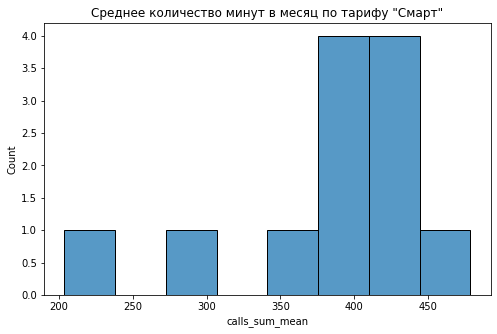

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(smart['calls_sum_mean'])
plt.title('Среднее количество минут в месяц по тарифу "Смарт"')
plt.show()



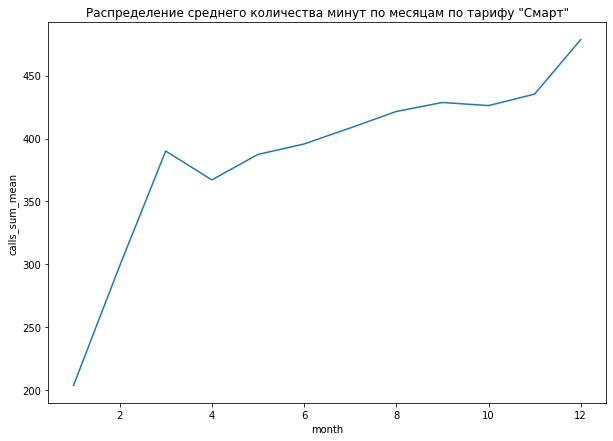

In [85]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='calls_sum_mean', x='month', data=smart)
plt.title('Распределение среднего количества минут по месяцам по тарифу "Смарт"')
plt.show;

In [86]:
smart['calls_sum_mean']

0     203.852941
1     298.689655
2     390.051948
3     367.133929
4     387.361702
5     395.640244
6     408.353234
7     421.468085
8     428.611538
9     426.136054
10    435.265823
11    478.560831
Name: calls_sum_mean, dtype: float64

In [87]:
ultra = df_calls[df_calls['tariff'] =='ultra']# сделаем срез по тарифу Ультра

In [88]:
display(ultra)

,tariff,month,calls_sum_mean
12,ultra,1.0,428.111111
13,ultra,2.0,297.125000
14,ultra,3.0,489.648649
15,ultra,4.0,458.018182
16,ultra,5.0,510.328358
17,ultra,6.0,479.702381
18,ultra,7.0,545.791209
19,ultra,8.0,510.775701
20,ultra,9.0,539.443478
21,ultra,10.0,558.081301


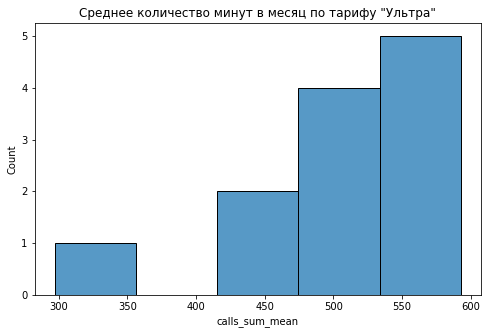

In [89]:
# сделаем гистограмму только на средную длительность звонка по тарифу Ультра
plt.figure(figsize=(8, 5))
sns.histplot(ultra['calls_sum_mean'])
plt.title('Среднее количество минут в месяц по тарифу "Ультра"')
plt.show()


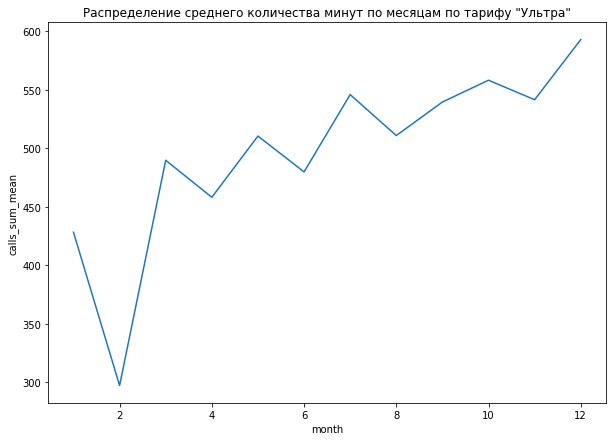

In [90]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='calls_sum_mean', x='month', data=ultra)
plt.title('Распределение среднего количества минут по месяцам по тарифу "Ультра"')
plt.show;

Сделаем сводную таблицу по интернету в разрезе тарифов, а затем построим гистограммы на основе ее данных.

In [91]:
df_internet = df_svod_final.pivot_table(index= ['tariff','month'],values= ['gb_used_sum'],aggfunc= ['mean']).reset_index()

In [92]:
df_internet.head()

,tariff,month,mean
,,,gb_used_sum
0,smart,1.0,8.735294
1,smart,2.0,11.844828
2,smart,3.0,15.233766
3,smart,4.0,13.625000
4,smart,5.0,15.907801


In [93]:
ultra_int = df_internet[df_internet['tariff'] =='ultra']

In [94]:
ultra_int.head()

,tariff,month,mean
,,,gb_used_sum
12,ultra,1.0,13.222222
13,ultra,2.0,12.000000
14,ultra,3.0,17.648649
15,ultra,4.0,16.963636
16,ultra,5.0,19.373134


In [95]:
ultra_int.columns = ['tariff','month','gb_used_sum_mean']# Убираем мультииндекс в названии столбца

In [96]:
ultra_int.head()

,tariff,month,gb_used_sum_mean
12,ultra,1.0,13.222222
13,ultra,2.0,12.000000
14,ultra,3.0,17.648649
15,ultra,4.0,16.963636
16,ultra,5.0,19.373134


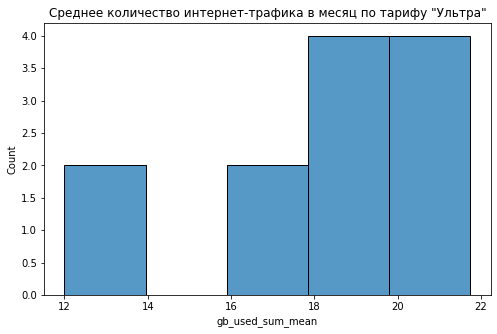

In [97]:
# сделаем гистограмму  на средний  интернет-трафик по тарифу Ультра
plt.figure(figsize=(8, 5))
sns.histplot(ultra_int['gb_used_sum_mean'])
plt.title('Среднее количество интернет-трафика в месяц по тарифу "Ультра"')
plt.show()

In [98]:
smart_int = df_internet[df_internet['tariff'] =='smart']

In [99]:
smart_int.head()

,tariff,month,mean
,,,gb_used_sum
0,smart,1.0,8.735294
1,smart,2.0,11.844828
2,smart,3.0,15.233766
3,smart,4.0,13.625000
4,smart,5.0,15.907801


In [100]:
smart_int.columns = ['tariff','month','gb_used_sum_mean']

In [101]:
smart_int.head()

,tariff,month,gb_used_sum_mean
0,smart,1.0,8.735294
1,smart,2.0,11.844828
2,smart,3.0,15.233766
3,smart,4.0,13.625000
4,smart,5.0,15.907801


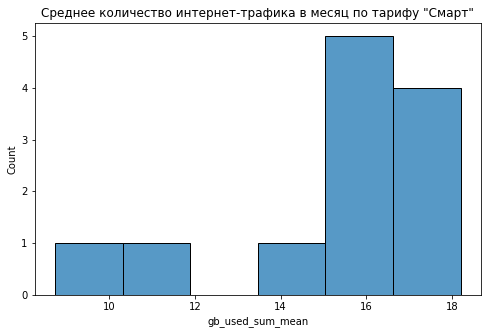

In [102]:
# сделаем гистограмму  на средний  интернет-трафик по тарифу Смарт
plt.figure(figsize=(8, 5))
sns.histplot(smart_int['gb_used_sum_mean'])
plt.title('Среднее количество интернет-трафика в месяц по тарифу "Смарт"')
plt.show()


Сделаем сводную таблицу по sms-сообщениям в разрезе тарифов, а затем построим гистограммы на основе ее данных.

In [103]:
df_mess = df_svod_final.pivot_table(index= ['tariff','month'],values= ['mess_count'],aggfunc= ['mean']).reset_index()

In [104]:
df_mess.head()

,tariff,month,mean
,,,mess_count
0,smart,1.0,18.235294
1,smart,2.0,24.086207
2,smart,3.0,31.857143
3,smart,4.0,30.741071
4,smart,5.0,33.773050


In [105]:
df_mess.columns = ['tariff','month','mess_count_mean']

In [106]:
smart_mess = df_mess[df_mess['tariff'] =='smart']

In [107]:
smart_mess.head()

,tariff,month,mess_count_mean
0,smart,1.0,18.235294
1,smart,2.0,24.086207
2,smart,3.0,31.857143
3,smart,4.0,30.741071
4,smart,5.0,33.773050


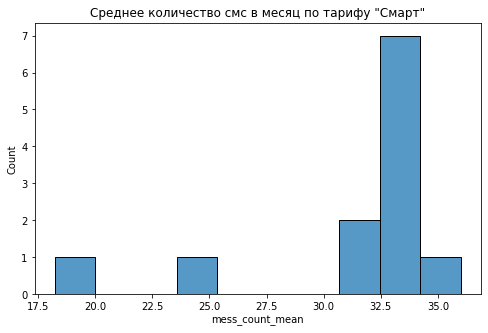

In [108]:
# сделаем гистограмму по среднему количеству смс в месяц по тарифу Смарт
plt.figure(figsize=(8, 5))
sns.histplot(smart_mess['mess_count_mean'])
plt.title('Среднее количество смс в месяц по тарифу "Смарт"')
plt.show()


In [109]:
ultra_mess = df_mess[df_mess['tariff'] =='ultra']

In [110]:
ultra_mess.head()

,tariff,month,mess_count_mean
12,ultra,1.0,33.777778
13,ultra,2.0,21.958333
14,ultra,3.0,32.297297
15,ultra,4.0,31.563636
16,ultra,5.0,37.850746


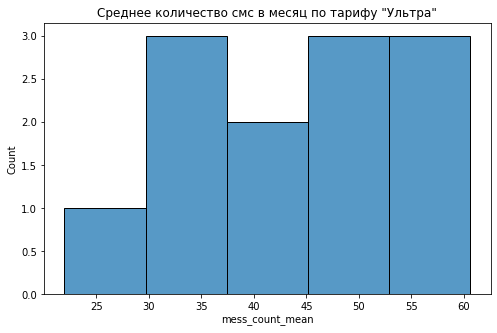

In [111]:
# сделаем гистограмму по среднему количеству смс в месяц по тарифу Ультра
plt.figure(figsize=(8, 5))
sns.histplot(ultra_mess['mess_count_mean'])
plt.title('Среднее количество смс в месяц по тарифу "Ультра"')
plt.show()

    Из гистограмм видно, что по продолжительности разговора в месяц  бОльшая часть абонентов использует только 450 минут по тарифу Смарт и 550 минут  по тарифу Ультра,
    Использует только  20 смс сообщений, максимально до 35 шт по тарифу Смарт, 30 смс,максимально до 60 шт по тарифу  Ультра
    И по интернет -трафику тратит 20 гигабайт по тарифу Ультра и   17 гигабайт по тарифу Смарт.
    Исходя из этого можно сделать вывод, что почти все абоненты укладываются в лимиты по тарифам.
    Также следует отметить, что смс сообщения мало используюся, в среднем 1 смс-соoбщение в день  по тарифу Смарт и 2смс-сообщения по тарифу Ультра.

## Проверка гипотез

Проверим гипотезы: 
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;   
•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки первой гипотезы нужно подготовить отдельные таблицы по Смарт и Ультра.

Посчитаем средную выручку в разрезе тарифов.

In [112]:
mean_tariff = df_svod_final.pivot_table(index= ['tariff'],values= ['revenue'], aggfunc= ['mean']).reset_index()

In [113]:
display(mean_tariff)

,tariff,mean
,,revenue
0,smart,1289.641704
1,ultra,2070.030426


Посчитаем  выручку по месяцам в разрезе тарифов Смарт и Ультра.

In [114]:
revenue = df_svod_final.pivot_table(index= ['tariff','month'],values= ['revenue']).reset_index()

In [115]:
display(revenue)

,tariff,month,revenue
0,smart,1.0,721.323529
1,smart,2.0,827.603448
2,smart,3.0,1164.623377
3,smart,4.0,963.089286
4,smart,5.0,1197.510638
5,smart,6.0,1204.018293
6,smart,7.0,1223.950249
7,smart,8.0,1320.595745
8,smart,9.0,1249.946154
9,smart,10.0,1364.853741


Сделаем срез  выручки по месяцам по тарифу Смарт отдельно.

In [116]:
smart = revenue[revenue['tariff'] =='smart']

In [117]:
display(smart)

,tariff,month,revenue
0,smart,1.0,721.323529
1,smart,2.0,827.603448
2,smart,3.0,1164.623377
3,smart,4.0,963.089286
4,smart,5.0,1197.510638
5,smart,6.0,1204.018293
6,smart,7.0,1223.950249
7,smart,8.0,1320.595745
8,smart,9.0,1249.946154
9,smart,10.0,1364.853741


Построим гистограммы размера выручки по тарифу Смарт

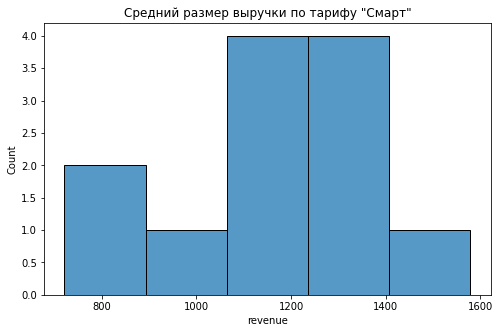

In [118]:

# сделаем гистограмму по размеру выручки по тарифу Смарт
plt.figure(figsize=(8, 5))
sns.histplot(smart['revenue'])
plt.title('Средний размер выручки по тарифу "Смарт"')
plt.show()


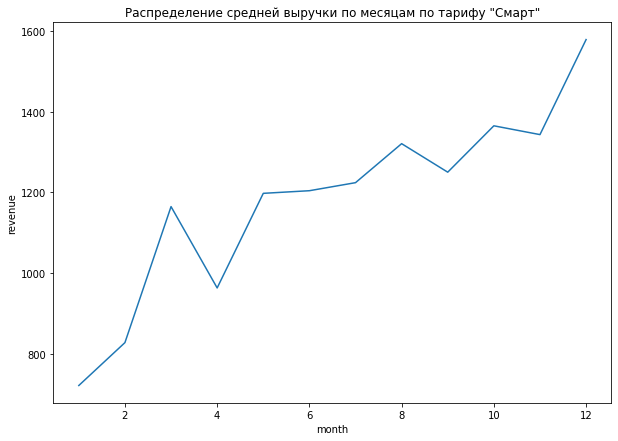

In [119]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='revenue', x='month', data=smart)
plt.title('Распределение средней выручки по месяцам по тарифу "Смарт"')
plt.show;

Сделаем срез выручки по месяцам по тарифу Ультра отдельно.

In [120]:
ultra = revenue[revenue['tariff'] =='ultra']

In [121]:
display(ultra)

,tariff,month,revenue
12,ultra,1.0,1950.000000
13,ultra,2.0,1975.000000
14,ultra,3.0,2014.864865
15,ultra,4.0,2001.818182
16,ultra,5.0,2059.701493
17,ultra,6.0,2039.285714
18,ultra,7.0,2118.131868
19,ultra,8.0,2083.177570
20,ultra,9.0,2024.347826
21,ultra,10.0,2065.853659


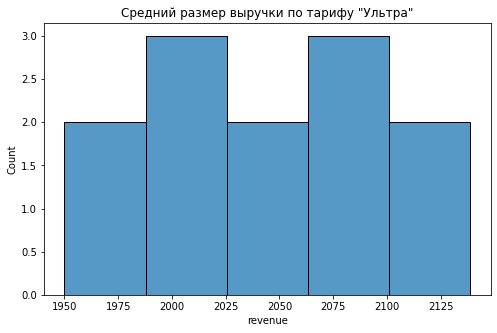

In [122]:

# сделаем гистограмму по размеру выручки в месяц по тарифу Ультра
plt.figure(figsize=(8, 5))
sns.histplot(ultra['revenue'])
plt.title('Средний размер выручки по тарифу "Ультра"')
plt.show()


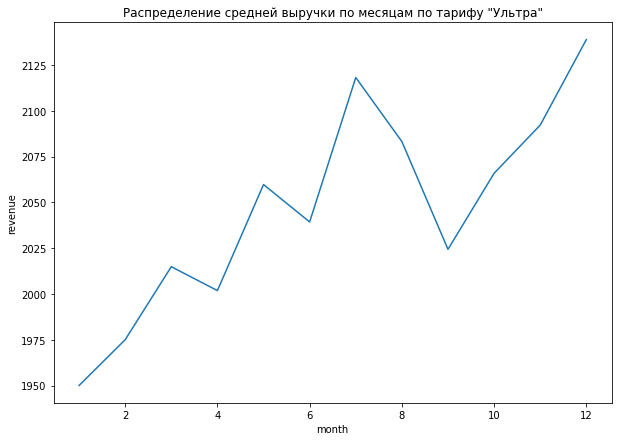

In [123]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='revenue', x='month', data=ultra)
plt.title('Распределение средней выручки по месяцам по тарифу "Ультра"')
plt.show;

     Из графиков и гистограмм по размерам выручки по тарифам, можно сделать следующие выводы:
     1.Основная доля абонентов по тарифу Смарт тратит на связь в размере 1100 до 1400 рублей, но есть и отдельная категория абонентов, которые тратят - от 1400 рублей, но эта категория незначительна.
     2.Основная доля абонентов по тарифу Ультра тратит на связь в размере до 2125 рублей, но есть и отдельная категория абонентов, которые тратят больше 2125 рублей, но эти категории тоже незначительны.

Сформируем нулевую и альтернативную гипотезы- Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

In [124]:
from scipy import stats as st

sample_1 = ultra['revenue']
sample_2 = smart['revenue']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 2.8039826949120406e-11
Отвергаем нулевую гипотезу


   Значит средние выручки тарифов Смарт и Ультра не равны.

Посчитаем  выручку по месяцам в разрезе г. Москвы и других городов.

In [125]:
revenue_city = df_svod_final.pivot_table(index= ['city','month'],values=['revenue']).reset_index()

In [126]:
display(revenue_city)

,city,month,revenue
0,Архангельск,1.0,550.000000
1,Архангельск,2.0,1350.000000
2,Архангельск,3.0,550.000000
3,Архангельск,4.0,1350.000000
4,Архангельск,5.0,950.000000
...,...,...,...
748,Ярославль,8.0,1185.000000
749,Ярославль,9.0,1555.333333
750,Ярославль,10.0,1784.000000
751,Ярославль,11.0,1336.666667


In [127]:
moscow =revenue_city[revenue_city['city'] =='Москва']

In [128]:
display(moscow)

,city,month,revenue
295,Москва,1.0,1475.000000
296,Москва,2.0,1175.142857
297,Москва,3.0,1649.600000
298,Москва,4.0,1503.310345
299,Москва,5.0,1465.128205
300,Москва,6.0,1500.723404
301,Москва,7.0,1448.571429
302,Москва,8.0,1600.709677
303,Москва,9.0,1548.544118
304,Москва,10.0,1547.790123


In [129]:
other_city =revenue_city[revenue_city['city']!='Москва']

In [130]:
display(other_city)


,city,month,revenue
0,Архангельск,1.0,550.000000
1,Архангельск,2.0,1350.000000
2,Архангельск,3.0,550.000000
3,Архангельск,4.0,1350.000000
4,Архангельск,5.0,950.000000
...,...,...,...
748,Ярославль,8.0,1185.000000
749,Ярославль,9.0,1555.333333
750,Ярославль,10.0,1784.000000
751,Ярославль,11.0,1336.666667


   Сформируем нулевую и альтернативную гипотезы - 
Н0 - Средняя выручка пользователей Москвы и средняя выручка пользователей из других регионов равны.
Н1 - Средняя выручка пользователей Москвы и средняя выручка пользователей из других регионов  не равны.

In [131]:
from scipy import stats as st

sample_1 = moscow['revenue']
sample_2 = other_city['revenue']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.7415955632008076
Не получилось отвергнуть нулевую гипотезу


Вывод -Значит средняя выручка в Москве и других городах не отличается!

При проверки гипотез применяла st.ttest_ind, т.к он проверяет гипотезы о равенстве или неравенстве средних значений выборки.

## Общий вывод по исследованию

     Проанализоровав данные по использованию тарифных планов компании "Мегалайн" и посчитав среднюю выручку по тарифам "Ультра" и "Смарт" можно сделать вывод, что выручка от тарифа "Ультра" больше,чем по тарифу "Смарт", а это значит,что тариф " Ультра" выгоднее для компании.
     
    Данный вывод подтверждается следующими аргументами:
    
      Из гистограмм по размерам выручки по тарифам, можно сделать следующие выводы:
      
    1.Основная доля абонентов по тарифу Смарт тратит на связь в размере 1100 до 1400 рублей, но есть и отдельная категория абонентов, которые тратят - от 1400 рублей, но эта категория незначительна.
     
    2. Основная доля абонентов по тарифу Ультра тратит на связь в размере до  2125 рублей, но есть и отдельная категория абонентов, которые тратят больше 2125 рублей, но эти категории тоже     незначительны.
    
    Также протестируя гипотезы и отвергнув нулевую гипотезу- Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны , пришли  к выводу,что  средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.
    Средняя выручка равна  по тарифу Ультра равна 2070.03, что в 1.68 раза больше, чем  по  тарифу Смарт 1289.64 рублей.
    
    Исходя из всего сказанного ,можно с уверенностью  сделать вывод, что компании следует увеличить бюджет на рекламу тарифа Ультра.
     
 
